# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip3 install folium

In [1260]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [1261]:
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# import ...  # your favorite data package
# import ...  # your favorite visualization package

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [1262]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train = pd.read_csv('nyc-taxi-trip-duration/train.csv')

In [1263]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [1264]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train = train.drop('dropoff_datetime', axis = 1)

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

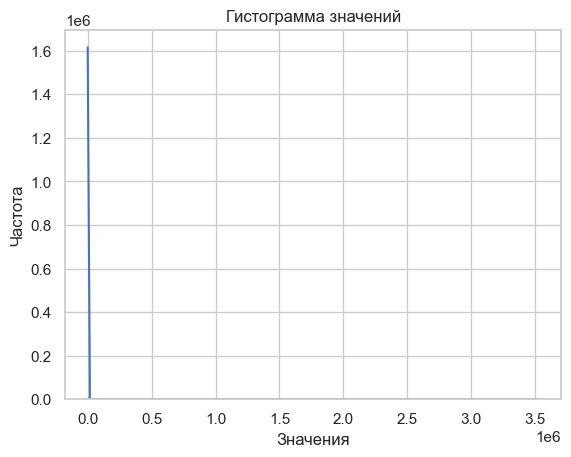

In [1266]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.histplot(train['trip_duration'], bins=1000, kde=True)
plt.title('Гистограмма значений')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Довольно большой разброс значений, наибольшая часть сконцентрирована в передела небольших значений, но есть и очень длинные в терминах секунд поездки

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

RMSLE менее чувствителен к большим значениям, поскольку он работает с логарифмами. В нашей ситуации это особенно полезно, так как данные имеют широкий диапазон значений.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Введем обозначения:
$\hat{y_i} = log(y_i + 1)$, $\hat{a(x_i)} = log(a(x_i) + 1)$

RMSLE в новых обозначениях:

$$RMSLE(X, y, a) = \sqrt{\frac{1}{l}\sum_{i = 1}^l(\hat{y_i} - \hat{a(x_i)})} = \sqrt{MSE(\hat{y_i}, \hat{a(x_i)})}$$
Легко и непринужденно получили удобный для расчета MSE

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [1267]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['log_trip_duration'] = np.log1p(train['trip_duration'])
train.drop(columns=['trip_duration'], inplace=True)

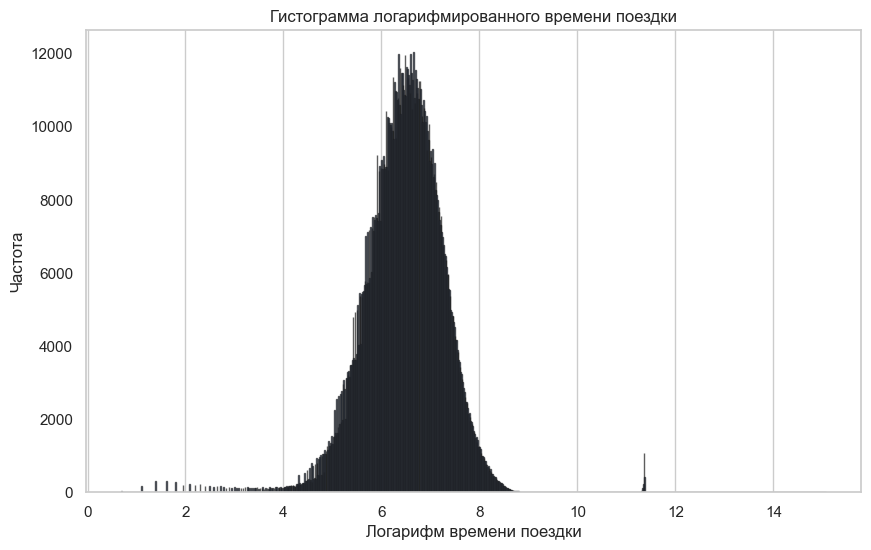

In [1268]:
plt.figure(figsize=(10, 6))
plt.hist(train['log_trip_duration'], bins=1000, edgecolor='k', alpha=0.7)
plt.title('Гистограмма логарифмированного времени поездки')
plt.xlabel('Логарифм времени поездки')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

Для MSE наилучшее константное приближение есть среднее, то есть $\hat{a(x_i)} = \overline{\hat{y}} = \overline{log(y+1)} = log(a(x_i) + 1)$

In [1269]:
def rmsle(log1p_y_true, log1p_y_pred):
    scal = np.sqrt(1/len(log1p_y_true))
    dif = scal*np.linalg.norm((log1p_y_true - log1p_y_pred))
    return dif

mean_trip_duration = np.exp((train['log_trip_duration']).mean()) - 1
rmsle_best_const = rmsle(np.array(train['log_trip_duration']), np.log1p(np.full(len(train), mean_trip_duration) + 1))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957607513833954


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

In [1271]:
train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642


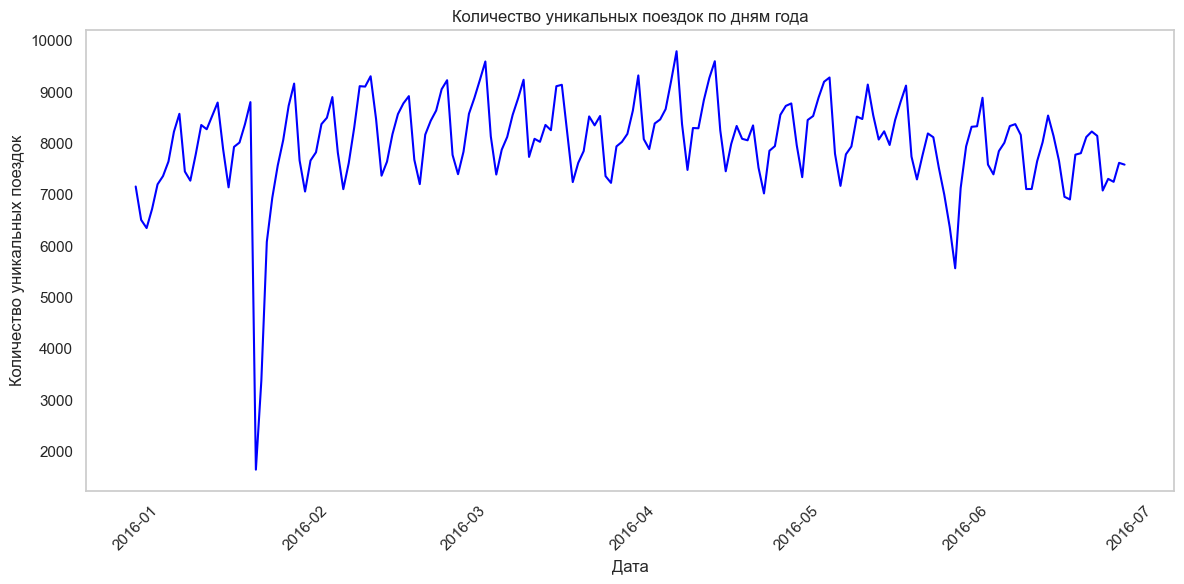

In [1272]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = train.copy()
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear
daily_rides = df.groupby('day_of_year')['id'].nunique()

start_date = df['pickup_datetime'].min().replace(month=1, day=1)
dates = [start_date + pd.Timedelta(days=i) for i in range(len(daily_rides))]

plt.figure(figsize=(12, 6))
plt.plot(dates, daily_rides.values, color='blue', linestyle='-')
plt.title('Количество уникальных поездок по дням года')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных поездок')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [1273]:
smallest_rides = daily_rides.nsmallest(10)

dates_with_least_rides = [start_date + pd.Timedelta(days=i) for i in smallest_rides.index]

result_df = pd.DataFrame({
    'Дата': dates_with_least_rides,
    'Количество уникальных поездок': smallest_rides.values
})

print(result_df)

                 Дата  Количество уникальных поездок
0 2016-01-24 00:00:17                           1648
1 2016-01-25 00:00:17                           3383
2 2016-05-31 00:00:17                           5570
3 2016-01-26 00:00:17                           6084
4 2016-01-04 00:00:17                           6353
5 2016-05-30 00:00:17                           6372
6 2016-01-03 00:00:17                           6512
7 2016-01-05 00:00:17                           6725
8 2016-06-21 00:00:17                           6910
9 2016-01-27 00:00:17                           6941


Наши выбросы - это 2016-01-24 и 2016-05-31

Что это за даты:
1. 23-24 января - снежная буря в Нью-Йорке.
2. 30 мая - Memorial day, это выходной день

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

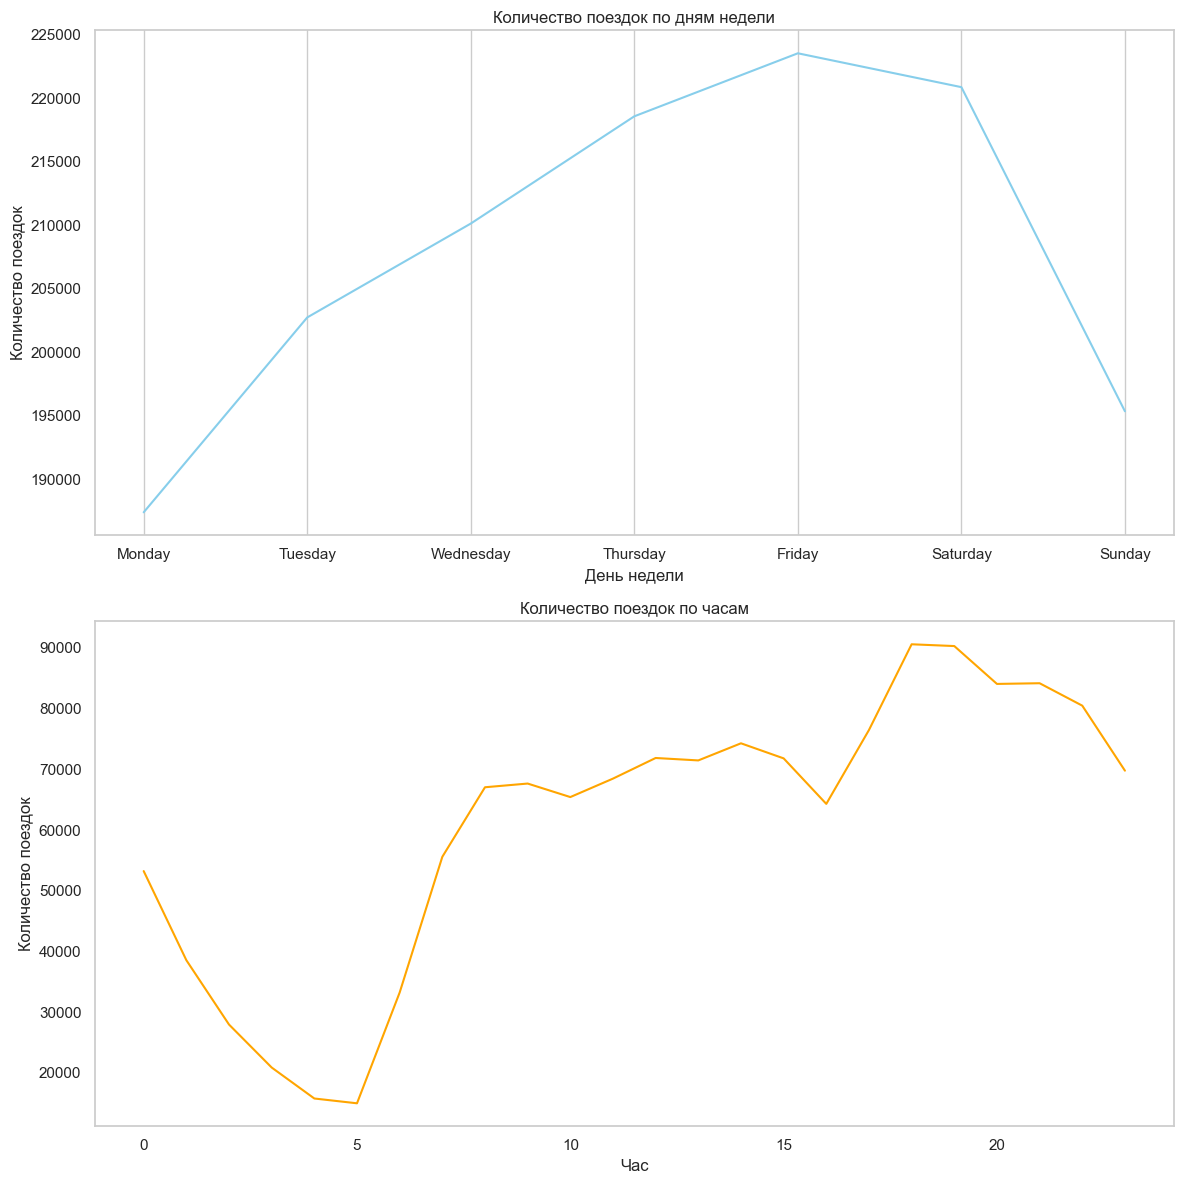

In [1275]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['hour'] = df['pickup_datetime'].dt.hour 

daily_weekday_rides = df.groupby('day_of_week').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
hourly_rides = df.groupby('hour').size()

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

daily_weekday_rides.plot(kind='line', ax=axs[0], color='skyblue')
axs[0].set_title('Количество поездок по дням недели')
axs[0].set_xlabel('День недели')
axs[0].set_ylabel('Количество поездок')
axs[0].grid(axis='y')

hourly_rides.plot(kind='line', ax=axs[1], color='orange')
axs[1].set_title('Количество поездок по часам')
axs[1].set_xlabel('Час')
axs[1].set_ylabel('Количество поездок')
axs[1].grid()

plt.tight_layout()
plt.show()


**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

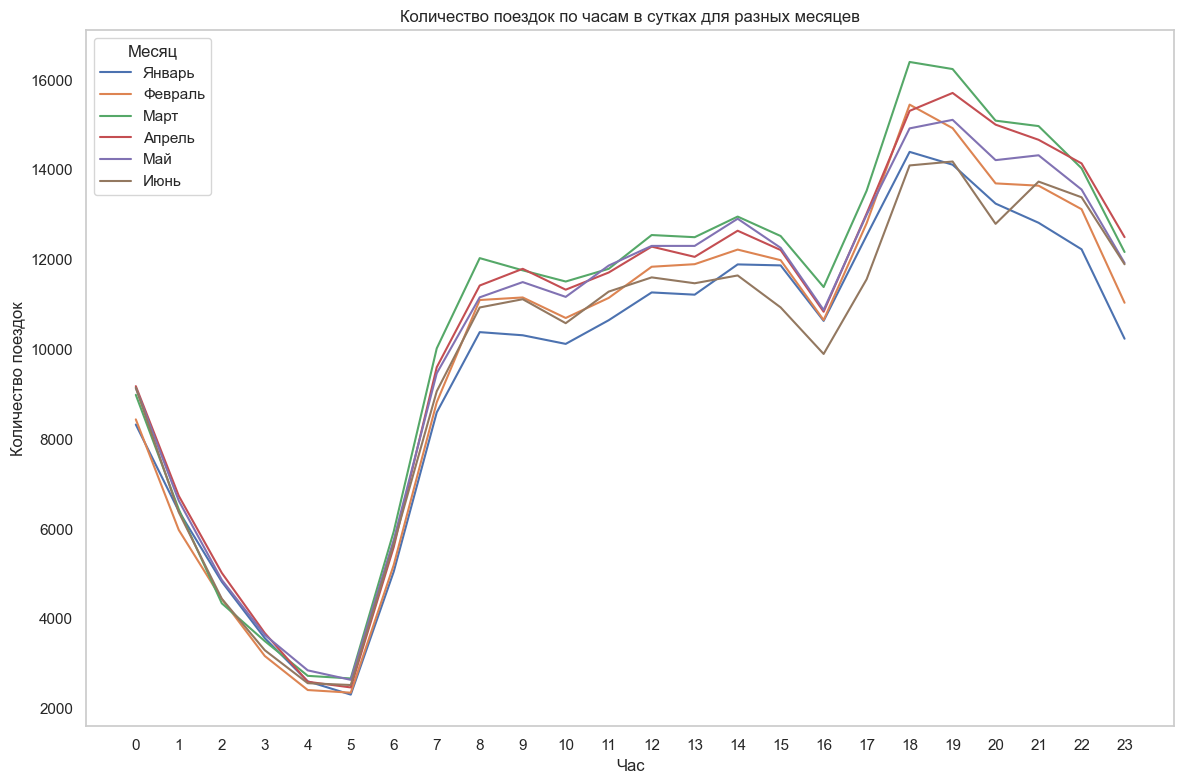

In [1276]:
df['month'] = df['pickup_datetime'].dt.month
monthly_hourly_rides = df.groupby(['month', 'hour']).size().unstack(level=0)

plt.figure(figsize=(12, 8))

month_names = [
    "Январь", "Февраль", "Март", "Апрель", "Май", "Июнь",
    "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"
]

for month in monthly_hourly_rides.columns:
    plt.plot(monthly_hourly_rides.index, monthly_hourly_rides[month], label=month_names[month - 1])

plt.title('Количество поездок по часам в сутках для разных месяцев')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(24))
plt.legend(title='Месяц')
plt.grid()
plt.tight_layout()
plt.show()

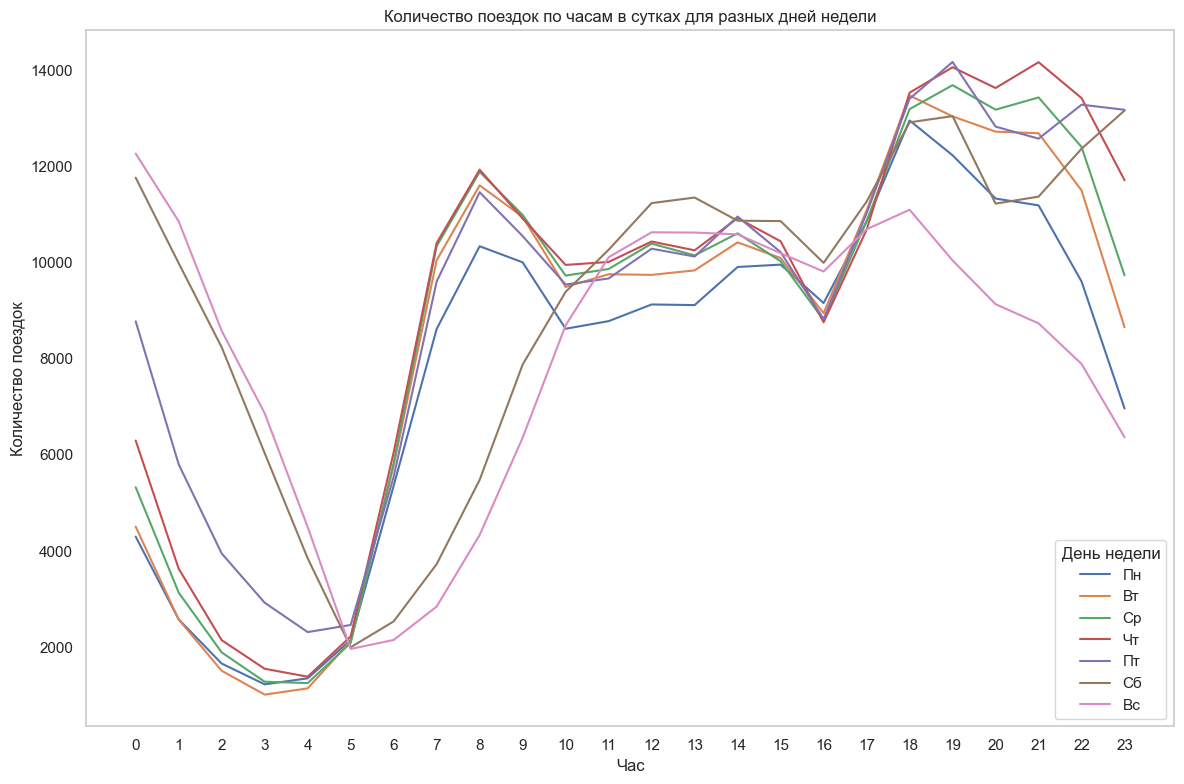

In [1278]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek

weekly_hourly_rides = df.groupby(['day_of_week_num', 'hour']).size().unstack(level=0)


plt.figure(figsize=(12, 8))

for day in weekly_hourly_rides.columns:
    plt.plot(weekly_hourly_rides.index, weekly_hourly_rides[day], label=f'Day {day}')

plt.title('Количество поездок по часам в сутках для разных дней недели')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(24))
plt.legend(title='День недели', labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.grid()
plt.tight_layout()
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

1. Очевидно, что по ночам (конкретно в период с 2 до 5 ночи) наблюдается наименьшее число заказов, связано это являение с тем пониженным спросом на такси в это время. При этом активность в выдеденный промежуток в рабочие дни меньше, чем в выходные, что может быть связано с тем, что в выходные люди чаще предпочитают вечерние и ночные развлечения:)
2. В среднем в весенние и летние месяцы спрос на поездки днем и вечером выше, чем в зимние, однако в утрение часы спрос однороден.


**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [1279]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['day_of_year'] = train['pickup_datetime'].dt.dayofyear
train['day_of_week_num'] = train['pickup_datetime'].dt.dayofweek
train['day_of_week'] = train['pickup_datetime'].dt.day_name()
train['hour'] = train['pickup_datetime'].dt.hour 
train['month'] = train['pickup_datetime'].dt.month 

In [1280]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df, test_df = train_test_split(train, test_size=0.3, random_state=42)

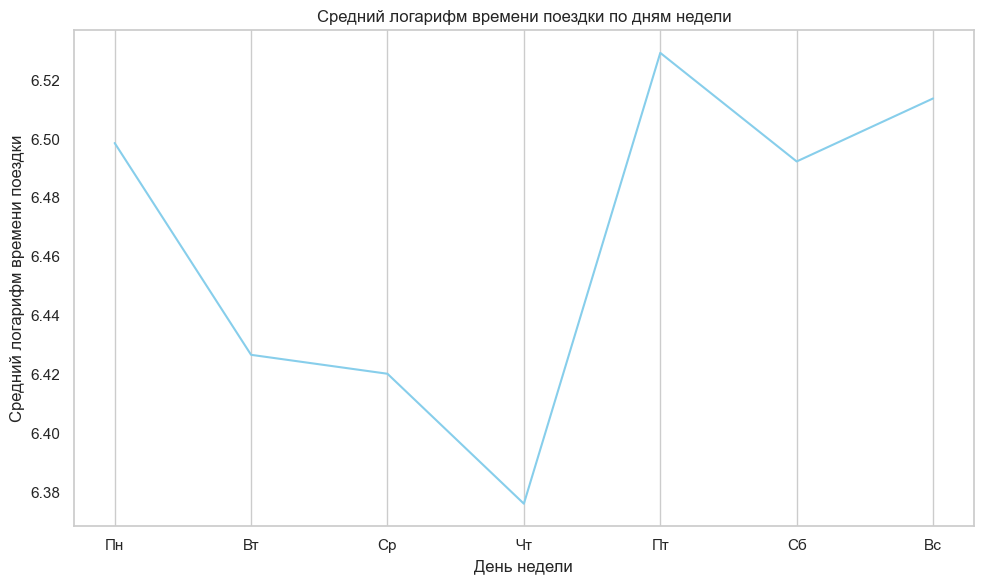

In [1281]:
avg_log_trip_duration_by_day = train_df.groupby('day_of_week')['log_trip_duration'].mean()

plt.figure(figsize=(10, 6))
avg_log_trip_duration_by_day.plot(kind='line', color='skyblue')
plt.title('Средний логарифм времени поездки по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средний логарифм времени поездки')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

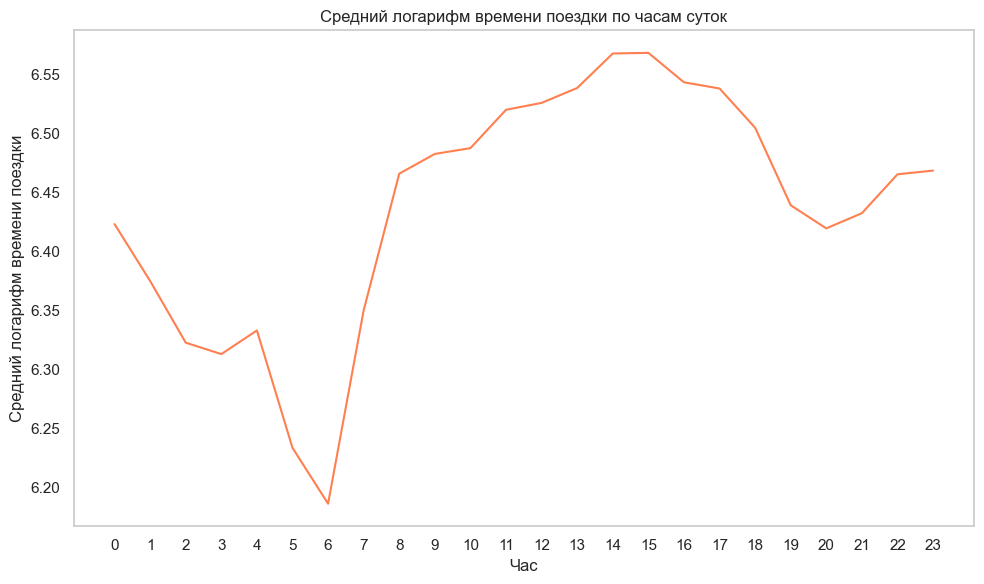

In [1282]:
avg_log_trip_duration_by_hour = train_df.groupby('hour')['log_trip_duration'].mean()

plt.figure(figsize=(10, 6))
avg_log_trip_duration_by_hour.plot(kind='line', color='coral')
plt.title('Средний логарифм времени поездки по часам суток')
plt.xlabel('Час')
plt.ylabel('Средний логарифм времени поездки')
plt.xticks(range(24))
plt.grid()
plt.tight_layout()
plt.show()

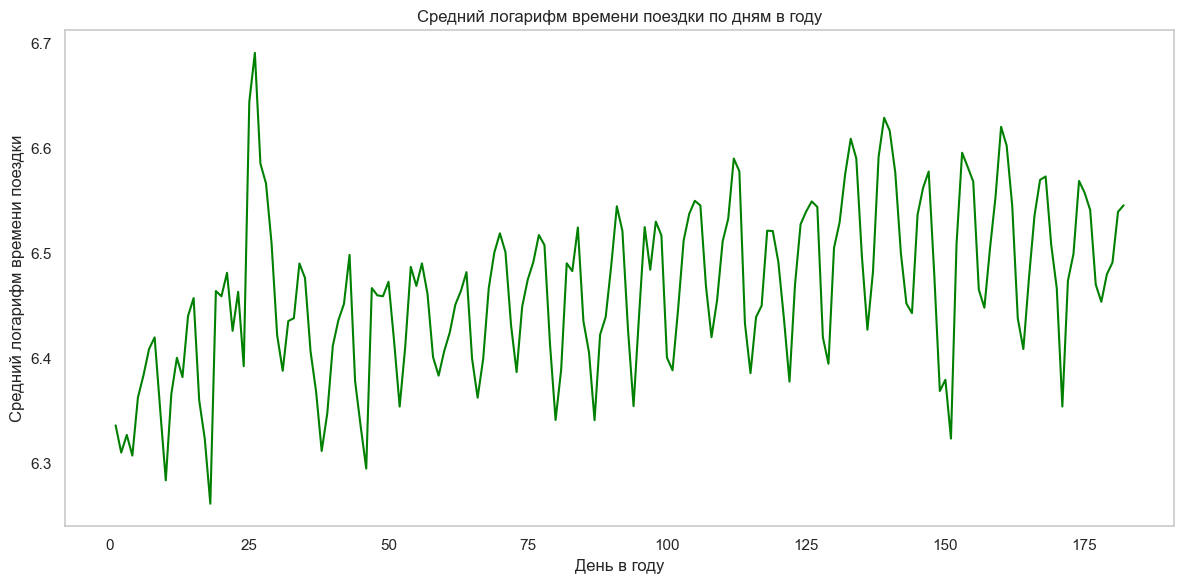

In [1283]:
avg_log_trip_duration_by_day_of_year = train_df.groupby('day_of_year')['log_trip_duration'].mean()

plt.figure(figsize=(12, 6))
avg_log_trip_duration_by_day_of_year.plot(kind='line', color='green')
plt.title('Средний логарифм времени поездки по дням в году')
plt.xlabel('День в году')
plt.ylabel('Средний логарифм времени поездки')
plt.grid()
plt.tight_layout()
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Графики зависимости таргета и количества поездок схожи, и это связано с тем, что во втором случае мы анализируем среднее значение таргета в зависимости от дня недели и времени суток, при этом учитывая количество поездок в конкретный день или час.

В моменты аномалий среднее значение таргета значительно ниже, чем в обычные дни - очевидно, во время снежной бури количество поездок было ограничено, и если они происходили, то, как правило, были скорее короткими.

Также можно заметить восходящий тренд в зависимости логарифмированного таргета от дня в году (очевидно из монотонности логарифма).

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

1. День недели = day_of_week
2. Месяц = month
3. Час = hour
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам) = is_24-01-2016 / is_31-05-2016
5. Номер дня в году = day_of_year

In [1284]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['is_24-01-2016'] = (train_df['pickup_datetime'] == '2016-01-24').astype(int)
train_df['is_31-05-2016'] = (train_df['pickup_datetime'] == '2016-05-31').astype(int)

test_df['is_24-01-2016'] = (test_df['pickup_datetime'] == '2016-01-24').astype(int)
test_df['is_31-05-2016'] = (test_df['pickup_datetime'] == '2016-05-31').astype(int)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

- месяц имеет смысл сделать категориальным признаком (представляет дискретные группы (январь, февраль и т.д.), которые могут иметь разные характеристики (например, сезонные изменения). Это позволяет выделить сезонные паттерны.)
- принадлежность аномальному дню маркируем отдельным бинарным признаком (каждый день отдельно)
- номер дня и часа будут сликом большим для энкодинга, их оставляем численными

Как итог:
- 'month', 'day_of_week', 'is_24-01-2016', 'is_31-05-2016', еще признаки будут рассмотрены ниже, но в категориальные подойду те признаки, у которых ограниченное неочень большое допустимое множество значний (как количество пассажиров, тип поставщика и т д ) - категориальные
- 'day_of_year', 'hour' - численные 

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [1285]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration',
       'day_of_year', 'day_of_week_num', 'day_of_week', 'hour', 'month',
       'is_24-01-2016', 'is_31-05-2016'],
      dtype='object')

In [1287]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = train_df[['day_of_week', 'month', 'hour', 'is_24-01-2016', 'is_31-05-2016', 'day_of_year']]
y_train = train_df['log_trip_duration']

X_test = test_df[['day_of_week', 'month', 'hour', 'is_24-01-2016', 'is_31-05-2016', 'day_of_year']]
y_test = test_df['log_trip_duration']

categorical_features = ['month', 'day_of_week', 'is_24-01-2016', 'is_31-05-2016']
numerical_features = ['day_of_year', 'hour']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

rmsle_value = rmsle(y_test, y_pred)
print(f'RMSLE: {rmsle_value}')

RMSLE: 0.7919531092212189


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [1288]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [1289]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
your_lat_values = train_df.sample(1000)['pickup_latitude']
your_lon_values = train_df.sample(1000)['pickup_longitude']

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

1. Полезными для задачи будут пункты в пределах аэропорта (La Guarda), так как аэропорты, как правило, являются центрами повышенного спроса на такси, особенно в часы прибытия и отправления рейсов. Изчение среднего врменеи поездки из/в эти места имеет экономический смысл, так как людям неободимо эффективнос выстраивать и оптимизировать свое расписание в соотвествии со временем вылета/прилета.
2. Точка возли гостиницы прямо напротив Central Park выглядит весьма примечательной, так как Центральный парк — это известная достопримечательность, привлекающая множество туристов и местных жителей, а гостиницы, расположенные вблизи таких объектов, также являются местами повышенного спроса на такси. также имеет экономический смысл изучение среднего времени поездки отсюда/сюда.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [1290]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    distance = R * c
    return distance


In [1291]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['haversine'] = train_df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], 
                                                         row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
test_df['haversine'] = test_df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], 
                                                         row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [1294]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['log_haversine'] = np.log1p(train_df['haversine'].replace(np.nan, 0))
test_df['log_haversine'] = np.log1p(test_df['haversine'].replace(np.nan, 0))

In [1295]:
train_df['is_24-01-2016'] = (train_df['pickup_datetime'] == '2016-01-24').astype(int)
train_df['is_31-05-2016'] = (train_df['pickup_datetime'] == '2016-05-31').astype(int)
test_df['is_24-01-2016'] = (test_df['pickup_datetime'] == '2016-01-24').astype(int)
test_df['is_31-05-2016'] = (test_df['pickup_datetime'] == '2016-05-31').astype(int)

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [1296]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
correlation_distance = train_df['log_trip_duration'].corr(train_df['haversine'])
correlation_log_distance = train_df['log_trip_duration'].corr(train_df['log_haversine'])
correlation_log_distance > correlation_distance

np.True_

Корреляция выше, значит, логарифм лучше отразает таргет.

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [1297]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['av_speed'] = train_df['haversine']*3600 / (np.exp(train_df['log_trip_duration']) - 1)

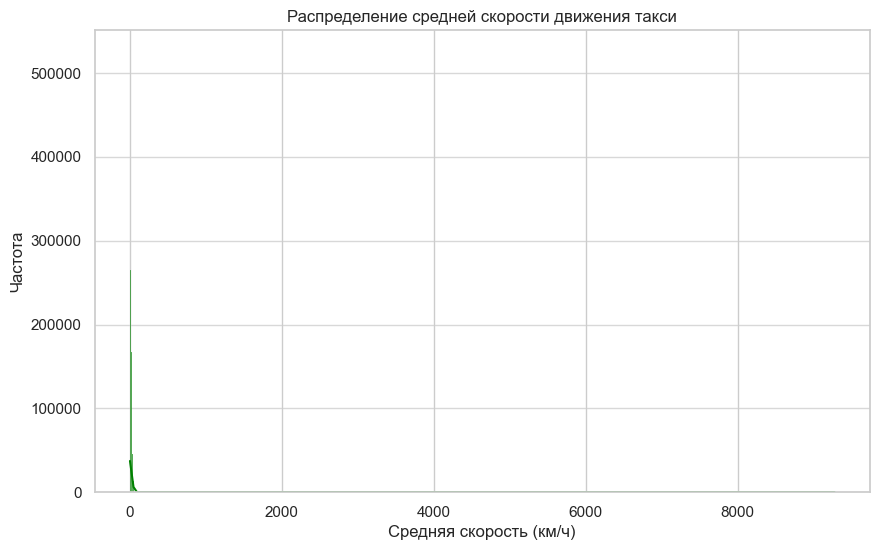

In [1301]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['av_speed'], bins=1000, kde=True, color='green', alpha=0.7)

plt.title('Распределение средней скорости движения такси')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)

plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

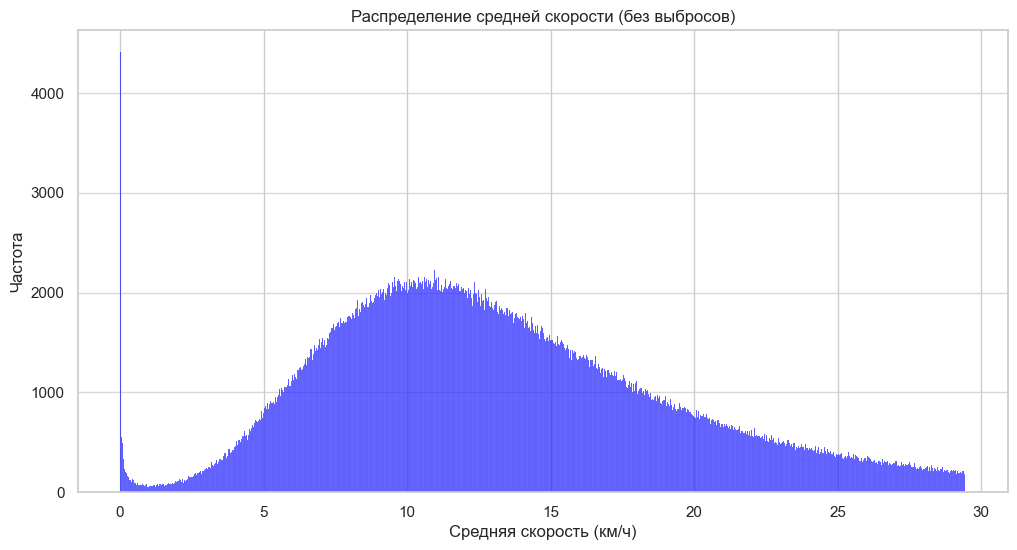

In [1303]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fil = train_df[train_df['av_speed'] <= np.percentile(train_df['av_speed'], 95)]

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(fil['av_speed'], bins=1000, color='blue', alpha=0.7, ax=ax)

plt.title('Распределение средней скорости (без выбросов)')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

Text(267.25, 0.5, 'День недели')

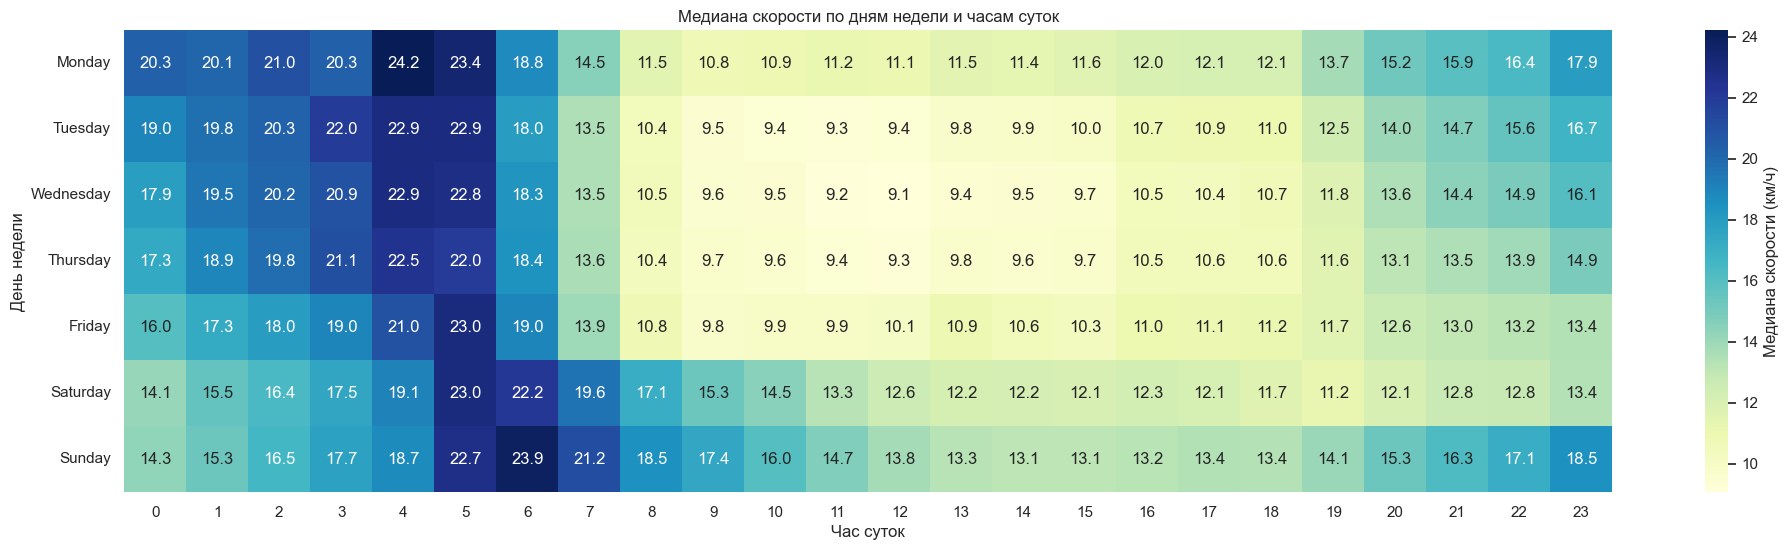

In [1304]:
median_speed = train_df.groupby(['day_of_week', 'hour'])['av_speed'].median().unstack()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
median_speed = median_speed.reindex(days_order)

plt.figure(figsize=(24, 6))
sns.heatmap(median_speed, cmap='YlGnBu', annot=True, fmt=".1f", cbar_kws={'label': 'Медиана скорости (км/ч)'})

plt.title('Медиана скорости по дням недели и часам суток')
plt.xlabel('Час суток')
plt.ylabel('День недели')

In [1305]:
median_speed

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Monday,20.321886,20.138217,21.028909,20.323811,24.216283,23.401148,18.772996,14.515631,11.517098,10.838139,...,11.405350,11.565641,12.002640,12.141558,12.104263,13.745964,15.249436,15.881996,16.361539,17.885426
Tuesday,18.987038,19.762714,20.296648,21.953491,22.942440,22.933517,17.993237,13.523563,10.436353,9.527145,...,9.885366,9.989059,10.729502,10.887601,10.991396,12.490597,14.035631,14.726587,15.573718,16.723276
Wednesday,17.862808,19.494701,20.152371,20.941153,22.926477,22.753551,18.326789,13.515571,10.518892,9.589429,...,9.536812,9.655463,10.484572,10.421431,10.718925,11.788600,13.564256,14.413749,14.888402,16.061811
Thursday,17.305269,18.929170,19.843321,21.139309,22.487561,22.025228,18.423010,13.595307,10.399796,9.719937,...,9.636942,9.741224,10.511434,10.596081,10.597583,11.583513,13.139479,13.544208,13.918589,14.905601
Friday,16.003068,17.279698,17.989489,18.956500,20.952063,22.975217,18.969700,13.922863,10.828096,9.834232,...,10.599800,10.326594,11.000297,11.065396,11.159900,11.659938,12.648170,13.002179,13.170605,13.402124
Saturday,14.138811,15.533271,16.361695,17.518415,19.117928,22.987934,22.198701,19.619367,17.074518,15.311037,...,12.207484,12.062747,12.277398,12.120390,11.682168,11.238903,12.082264,12.780249,12.828523,13.350451
Sunday,14.304210,15.322084,16.534759,17.718611,18.729315,22.709322,23.875976,21.179755,18.515663,17.421109,...,13.107162,13.142860,13.228467,13.421699,13.381156,14.088654,15.309740,16.263464,17.060939,18.499218


Не забудьте удалить колонку со значением скорости из данных! (я это учла ниже, не переживайте)

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Переменная av_speed определяется через log_trip_duration, то есть av_speed является функцией от целевой переменной, что нарушает предпосылки линейной регрессии о необходимости, чтобы предикторы были независимыми от целевой переменной, такая переменная будет обеспечивать таргет лик:)

In [1306]:
train_df = train_df.drop('av_speed', axis = 1)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

1. Периоды особенно больших пробок наблюдаются во все рабочие дни с 8 до 15
2. Наименьшие пробки наблюдаются по ночам  - ежедневно, а в особенноси в рабочие дни в период с 4 до 5 утра

In [1307]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['in_traffic'] = (
    (train_df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & 
    (train_df['hour'].between(8, 14))
    )

train_df['free_roads'] = ((train_df['hour'].between(4, 5)))

train_df['in_traffic'] = train_df['in_traffic'].astype(int)
train_df['free_roads'] = train_df['free_roads'].astype(int)


test_df['in_traffic'] = (
    (test_df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & 
    (test_df['hour'].between(8, 14))
    )

test_df['free_roads'] = ((test_df['hour'].between(4, 5)))

test_df['in_traffic'] = test_df['in_traffic'].astype(int)
test_df['free_roads'] = test_df['free_roads'].astype(int)

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [1308]:
def is_within_radius(lat, lon, center_coords, r=0.1):
    dist = haversine(lat, lon, center_coords[0], center_coords[1])
    return dist <= r

airport_coords = (40.777250, -73.872611)
park_coords = (40.766138, -73.978617)

In [1309]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['started_in_airport'] =  train_df.apply(lambda row: is_within_radius(row['pickup_latitude'], row['pickup_longitude'], airport_coords), axis=1)
train_df['finished_in_airport'] = train_df.apply(lambda row: is_within_radius(row['dropoff_latitude'], row['dropoff_longitude'], airport_coords), axis=1)

train_df['started_in_cent_park'] = train_df.apply(lambda row: is_within_radius(row['pickup_latitude'], row['pickup_longitude'], park_coords), axis=1)
train_df['finished_in_cent_park'] = train_df.apply(lambda row: is_within_radius(row['dropoff_latitude'], row['dropoff_longitude'], park_coords), axis=1)

test_df['started_in_airport'] =  test_df.apply(lambda row: is_within_radius(row['pickup_latitude'], row['pickup_longitude'], airport_coords), axis=1)
test_df['finished_in_airport'] = test_df.apply(lambda row: is_within_radius(row['dropoff_latitude'], row['dropoff_longitude'], airport_coords), axis=1)

test_df['started_in_cent_park'] = test_df.apply(lambda row: is_within_radius(row['pickup_latitude'], row['pickup_longitude'], park_coords), axis=1)
test_df['finished_in_cent_park'] = test_df.apply(lambda row: is_within_radius(row['dropoff_latitude'], row['dropoff_longitude'], park_coords), axis=1)

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

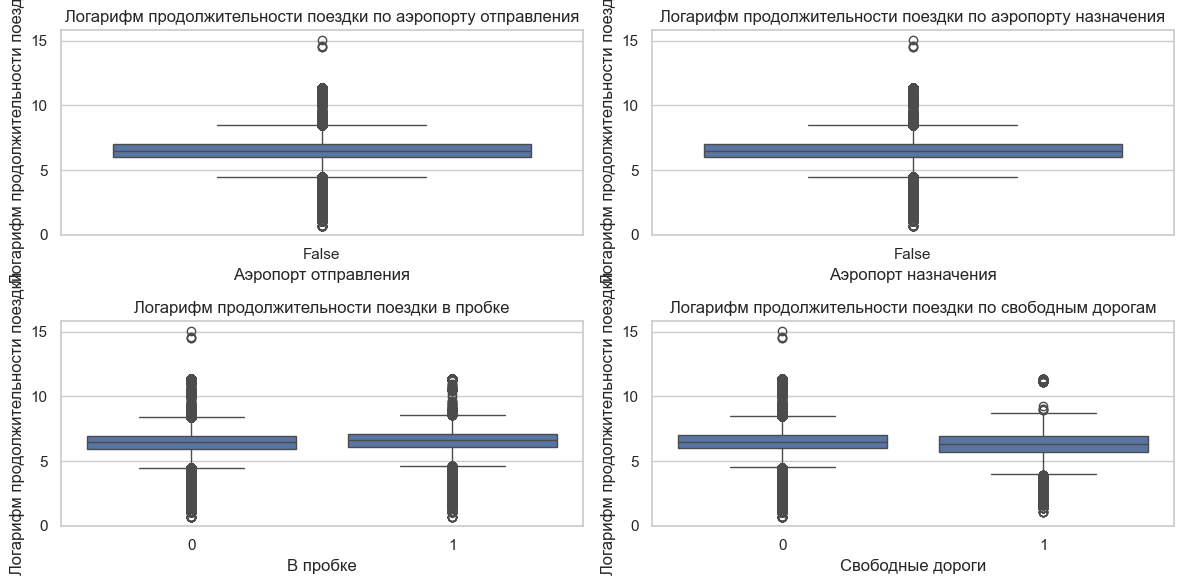

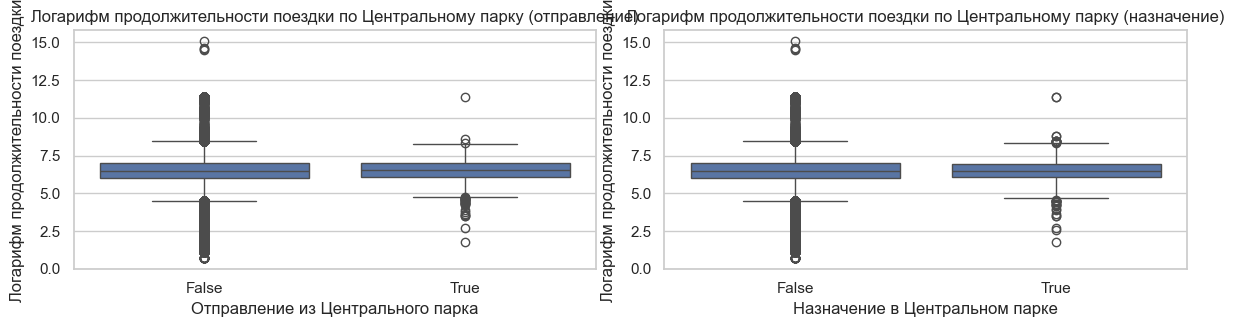

In [1319]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x='started_in_airport', y='log_trip_duration', data=train_df)
plt.title('Логарифм продолжительности поездки по аэропорту отправления')
plt.xlabel('Аэропорт отправления')
plt.ylabel('Логарифм продолжительности поездки')

plt.subplot(2, 2, 2)
sns.boxplot(x='finished_in_airport', y='log_trip_duration', data=train_df)
plt.title('Логарифм продолжительности поездки по аэропорту назначения')
plt.xlabel('Аэропорт назначения')
plt.ylabel('Логарифм продолжительности поездки')

plt.subplot(2, 2, 3)
sns.boxplot(x='in_traffic', y='log_trip_duration', data=train_df)
plt.title('Логарифм продолжительности поездки в пробке')
plt.xlabel('В пробке')
plt.ylabel('Логарифм продолжительности поездки')

plt.subplot(2, 2, 4)
sns.boxplot(x='free_roads', y='log_trip_duration', data=train_df)
plt.title('Логарифм продолжительности поездки по свободным дорогам')
plt.xlabel('Свободные дороги')
plt.ylabel('Логарифм продолжительности поездки')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x='started_in_cent_park', y='log_trip_duration', data=train_df)
plt.title('Логарифм продолжительности поездки по Центральному парку (отправление)')
plt.xlabel('Отправление из Центрального парка')
plt.ylabel('Логарифм продолжительности поездки')

plt.subplot(2, 2, 2)
sns.boxplot(x='finished_in_cent_park', y='log_trip_duration', data=train_df)
plt.title('Логарифм продолжительности поездки по Центральному парку (назначение)')
plt.xlabel('Назначение в Центральном парке')
plt.ylabel('Логарифм продолжительности поездки')

plt.tight_layout()
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

С одной стороны, признаки не очень информативны, так как на каждом из них наблюдается значительное количество выбросов.

Кроме того, можно заметить, что распределение значений в двух категориях признаков схоже: основная масса значений сконцентрирована в одном диапазоне, что говорит о том, что принадлежность к одной из категорий внутри признака не обязательно указывает на различия в целевой переменной.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [1342]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=4, n_cols=3):
        self.n_rows = n_rows
        self.n_cols = n_cols

        #список всех координат для визуализации:
        self.lat = None
        self.lon = None

        # граница всего большого прямоугольника
        self.lat_min = 0
        self.lat_max = 0
        self.lon_min = 0
        self.lon_max = 0

        # парметры ячейки одной
        self.cell_width = 0
        self.cell_height = 0

    def fit(self, X):

        # делать будем так: необходимо определить область, где происходили основные поездки, 
        # то есть установить границы широты и долготы, используя квантильное распределение координат.

        self.lon= np.concatenate((X['dropoff_longitude'],X['pickup_longitude']), axis = None)
        self.lat =  np.concatenate((X['dropoff_latitude'],X['pickup_latitude']), axis = None)
        
        self.lat_min = np.quantile(self.lat ,0.05)
        self.lat_max = np.quantile(self.lat ,0.85)
        self.lon_min = np.quantile(self.lon,0.05)
        self.lon_max = np.quantile(self.lon,0.85)
        
        self.cell_width = (self.lon_max - self.lon_min) / self.n_cols
        self.cell_height = (self.lat_max - self.lat_min) / self.n_rows
        
        return self
    

    def transform(self, X):
        X_trans = X.copy()
    
        X_trans['start_num'] = ((X['pickup_longitude'] - self.lon_min) // self.cell_width * self.n_cols +
                                    (X['pickup_latitude'] - self.lat_min) // self.cell_height).astype(int)
        X_trans['finish_num'] = ((X['dropoff_longitude'] - self.lon_min) // self.cell_width * self.n_cols +
                                    (X['dropoff_latitude'] - self.lat_min) // self.cell_height).astype(int)
        
        X_trans['start_num'] = np.where((X_trans['start_num'] >= 0) & (X_trans['start_num'] <= 11), X_trans['start_num'], -1)
        X_trans['finish_num'] = np.where((X_trans['finish_num'] >= 0) & (X_trans['finish_num'] <= 11), X_trans['finish_num'], -1)
        return X_trans
    
    def show_map(self):
        location = (np.mean(self.lat), np.mean(self.lon))
        m = folium.Map(location=location, zoom_start=13)

        for j in range(self.n_cols + 1):
            lon = self.lon_min + j * self.cell_width
            folium.PolyLine(
                [(self.lat_min, lon), (self.lat_max, lon)],
                color="pink",
                weight=5
            ).add_to(m)
        
        for i in range(self.n_rows + 1):
            lat = self.lat_min + i * self.cell_height
            folium.PolyLine(
                [(lat, self.lon_min), (lat, self.lon_max)],
                color="pink",
                weight=5
            ).add_to(m)
            
        return m


transformer = MapGridTransformer(n_rows=4, n_cols=3)
transformer.fit(train_df)
transformed_data = transformer.transform(train_df)
map_object = transformer.show_map()
map_object 

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [1314]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
transformer = MapGridTransformer(n_rows=4, n_cols=3)
transformer.fit(train_df)
X_train_trans = transformer.transform(train_df)

X_test_trans = transformer.fit(test_df)
X_test_trans = transformer.transform(test_df)

X = X_train_trans[['store_and_fwd_flag', 'day_of_year', 
            'day_of_week', 'hour', 'month', 'log_haversine',
            'in_traffic', 'free_roads', 'started_in_airport', 
            'finished_in_airport', 'started_in_cent_park','finished_in_cent_park', 'is_24-01-2016', 'is_31-05-2016', 'start_num',
       'finish_num']]
y = X_train_trans['log_trip_duration']

Xtest = X_test_trans[['store_and_fwd_flag', 'day_of_year', 
             'day_of_week', 'hour', 'month', 'log_haversine',
            'in_traffic', 'free_roads', 'started_in_airport', 
            'finished_in_airport', 'started_in_cent_park','finished_in_cent_park', 'is_24-01-2016', 'is_31-05-2016', 
            'start_num','finish_num']]
ytest = X_test_trans['log_trip_duration']

categorical_features = ['day_of_week', 
                        'month', 'start_num', 'finish_num','in_traffic', 'free_roads', 'started_in_airport', 
            'finished_in_airport', 'started_in_cent_park','finished_in_cent_park','is_24-01-2016', 'is_31-05-2016']
numerical_features = ['log_haversine', 'day_of_year', 'hour']


pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )),
    ('regressor', Ridge())
])

pipeline.fit(X, y)
predictions = pipeline.predict(Xtest)
rmsle_value = rmsle(ytest, predictions)
print(f'RMSLE: {rmsle_value}')

RMSLE: 0.49278504111191057


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

1. Идентификатор оператора (Vendor_id) может быть важным, так как различные поставшим услуг такси могут использовать разные автомобили и иметь водителей, которые имеют разный уровень подготовки в плане ориентации в городе или иных возможностях навигации, что позволяет им выбирать более эффективные маршруты и оптимизировать время поездки.

2. Количество пассажиров (Passenger_count) может свидетельствовать о том, что такси могло быть вызвано для нескольких адресов сразу, что, в свою очередь, значительно увеличивает общее время поездки.

3. Признак storeandfwd_flag, согласно информаии с Kaggle:

"флаг указывает, была ли запись о поездке сохранена в памяти автомобиля перед отправкой оператору из-за отсутствия соединения с сервером."

Этот флаг может указывать на дальность поездки и, следовательно, на ее большую продолжительность: водителю пришлось проехать так далеко, что в этом районе была плохая связь. Кроме того, на отсутствие сигнала могли повлиять неблагоприятные погодные условия, что также непосредственно отразится на продолжительности поездки.


Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [1315]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train_df['vendor_id'].nunique() # unique_vendor_id

2

In [1316]:
train_df['passenger_count'].nunique() # unique_passenger_count

10

In [1317]:
train_df['store_and_fwd_flag'].nunique() # unique_store_and_fwd_flag

2

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

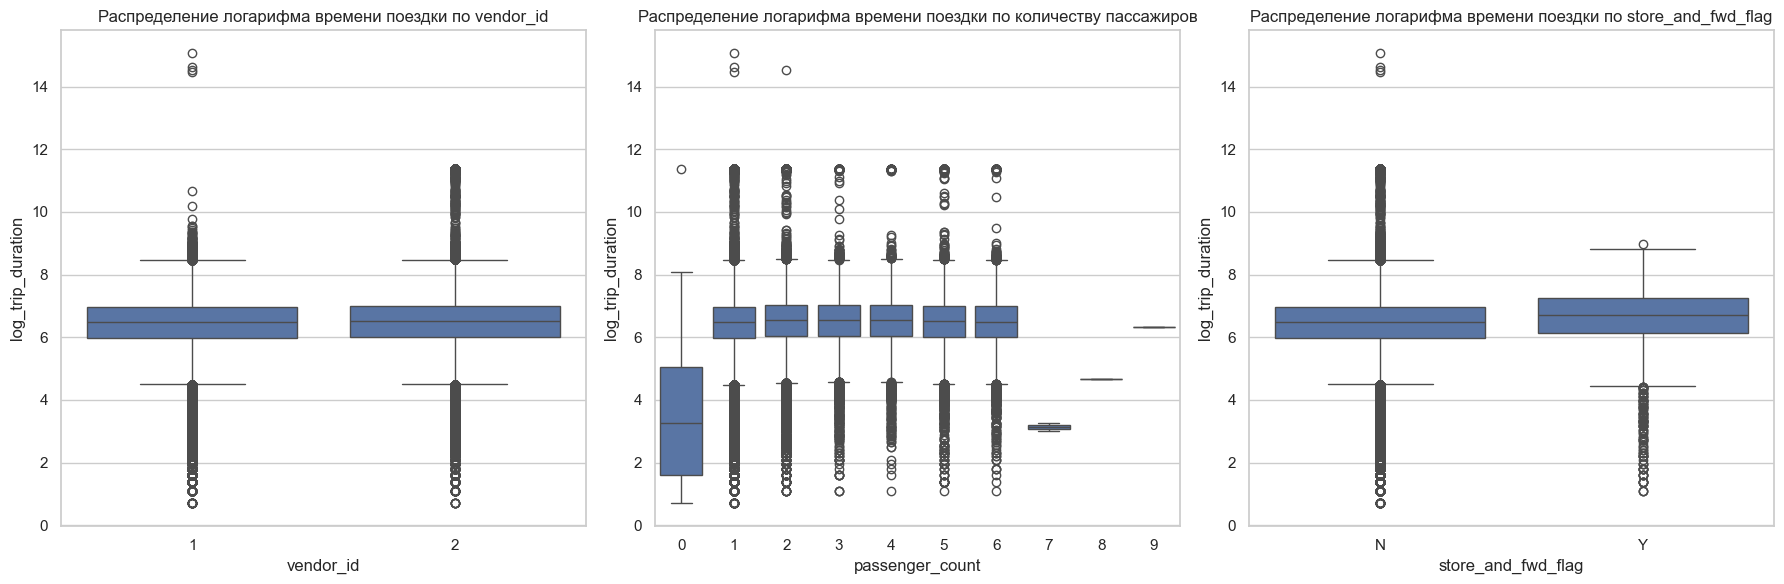

In [1320]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='vendor_id', y='log_trip_duration', data=train_df, ax=axes[0])
axes[0].set_title('Распределение логарифма времени поездки по vendor_id')

sns.boxplot(x='passenger_count', y='log_trip_duration', data=train_df, ax=axes[1])
axes[1].set_title('Распределение логарифма времени поездки по количеству пассажиров')

sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=train_df, ax=axes[2])
axes[2].set_title('Распределение логарифма времени поездки по store_and_fwd_flag')

plt.tight_layout()
plt.show()

Распределение признаков разное, признаки не оч

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [1240]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_trans['vendor_id'] = X_train_trans['vendor_id'].map({2: 1, 1: 0})
X_train_trans['store_and_fwd_flag'] = X_train_trans['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

X_test_trans['vendor_id'] = X_test_trans['vendor_id'].map({2: 1, 1: 0})
X_test_trans['store_and_fwd_flag'] = X_test_trans['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Скорее всего, нет - как и в случае с предыдущими ящиками с усами, в этих признаках наблюдается значительное количество выбросов, а также схожее распределение внутри одной категории, а значит, можно предположить, что эти признаки не повлияют (по крайней меере значительно) положительно на качество модели.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [1321]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X = X_train_trans[['vendor_id','passenger_count', 'store_and_fwd_flag', 'day_of_year', 
            'day_of_week', 'hour', 'month', 'log_haversine',
            'in_traffic', 'free_roads', 'started_in_airport', 
            'finished_in_airport', 'started_in_cent_park','finished_in_cent_park', 'is_24-01-2016', 'is_31-05-2016', 'start_num',
       'finish_num']]

y = X_train_trans['log_trip_duration']

Xtest = X_test_trans[['vendor_id','passenger_count', 'store_and_fwd_flag', 'day_of_year', 
            'day_of_week', 'hour', 'month', 'log_haversine',
            'in_traffic', 'free_roads', 'started_in_airport', 
            'finished_in_airport', 'started_in_cent_park','finished_in_cent_park', 'is_24-01-2016', 'is_31-05-2016', 'start_num',
       'finish_num']]

ytest = X_test_trans['log_trip_duration']

categorical_features = ['vendor_id', 'store_and_fwd_flag', 'passenger_count', 'day_of_week', 'month', 
                        'start_num', 'finish_num', 'in_traffic', 'free_roads', 
                        'started_in_airport', 'finished_in_airport', 
                        'started_in_cent_park','finished_in_cent_park',
                        'is_24-01-2016', 'is_31-05-2016']
numerical_features = ['log_haversine', 'day_of_year', 'hour']


transformer = MapGridTransformer(n_rows=4, n_cols=3)
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )),
    ('regressor', Ridge())
])

pipeline.fit(X, y)
predictions = pipeline.predict(Xtest)
predictions_train = pipeline.predict(X)
rmsle_value = rmsle(ytest, predictions)
print(f'RMSLE: {rmsle_value}')

RMSLE: 0.4923219930973547


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [1322]:
X_train_trans.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration',
       'day_of_year', 'day_of_week_num', 'day_of_week', 'hour', 'month',
       'is_24-01-2016', 'is_31-05-2016', 'haversine', 'log_haversine',
       'in_traffic', 'free_roads', 'started_in_airport', 'finished_in_airport',
       'started_in_cent_park', 'finished_in_cent_park', 'start_num',
       'finish_num'],
      dtype='object')

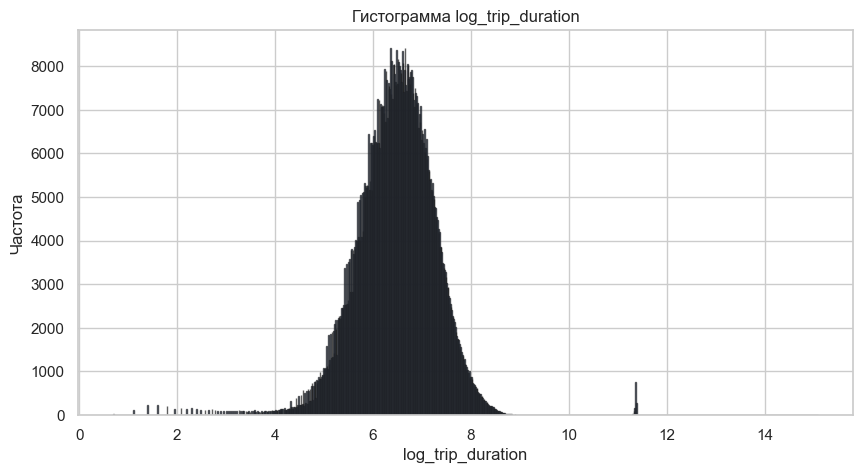

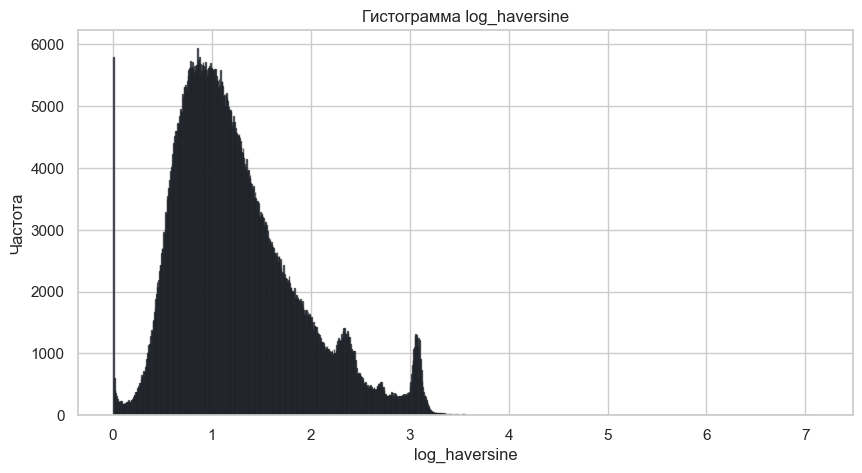

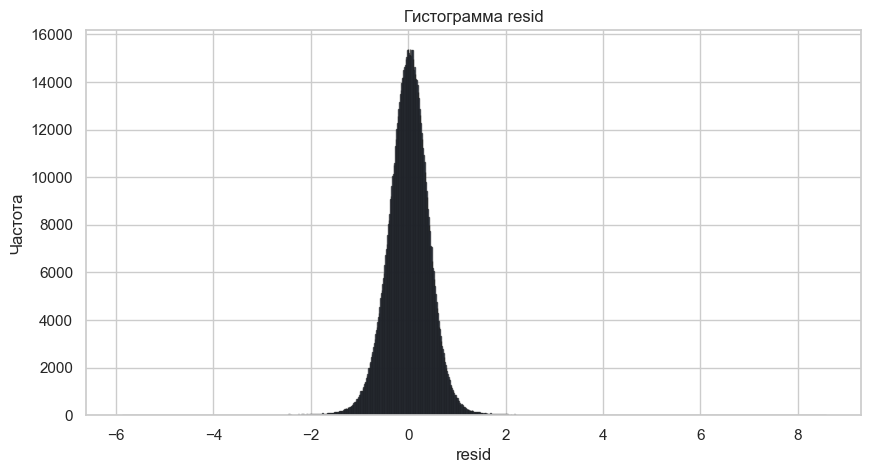

In [1323]:
def plot_histograms(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 5))
        plt.hist(df[col], bins=1000, edgecolor='k', alpha=0.7)
        plt.title(f'Гистограмма {col}')
        plt.xlabel(col)
        plt.ylabel('Частота')
        plt.show()

X_train_trans['resid'] = y - predictions_train
columns_to_plot = ['log_trip_duration', 'log_haversine', 'resid']
plot_histograms(X_train_trans, columns_to_plot)


Для отчистки выборки от выбросов используем правило трех сигм (а почему нет, кстати, попробуем добиться некоторой однородности в данных):

In [1244]:
X_train_trans.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration',
       'day_of_year', 'day_of_week_num', 'day_of_week', 'hour', 'month',
       'is_24-01-2016', 'is_31-05-2016', 'haversine', 'log_haversine',
       'in_traffic', 'free_roads', 'started_in_airport', 'finished_in_airport',
       'started_in_cent_park', 'finished_in_cent_park', 'start_num',
       'finish_num', 'resid'],
      dtype='object')

In [1324]:
def remove_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_to_filter= ['log_trip_duration', 'haversine']
for col in columns_to_filter:
    X_train_trans = remove_outliers(X_train_trans, col)

print(f'Размерность обучающей выборки после удаления выбросов: {X_train_trans.shape}')

Размерность обучающей выборки после удаления выбросов: (986041, 28)


Ну порезали и порезали, ладно, чегоне сделаешь РАДИ РОСТА МЕТРИК!!!

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

1. Признаки аномалий очень редки - фактически они имеются только у двух определнных периодов, сейчас их влияние на общую картину минимально. Объединение этих аномальных признаков в один может повысить информативность, так как это позволит избежать избыточности и сосредоточиться на более значимых аспектах.

2. Признаки, связанные с приездом в аэропорт и отъездом из него, интуитивно эквивалентны, поскольку обе ситуации предполагают схожие условия поездки: необходимость преодоления значительного расстояния и, возможно, схожие временные затраты и логистические аспекты. Объединение этих признаков в один может упростить модель и улучшить её интерпретируемость.

In [1325]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_trans['airport'] = ((X_train_trans['started_in_airport'] == 1) | (X_train_trans['finished_in_airport'] == 1)).astype(int)
X_train_trans['anomalia'] = ((X_train_trans['is_24-01-2016'] == 1) | (X_train_trans['is_31-05-2016'] == 1)).astype(int)

X_test_trans['airport'] = ((test_df['started_in_airport'] == 1) | (X_test_trans['finished_in_airport'] == 1)).astype(int)
X_test_trans['anomalia'] = ((test_df['is_24-01-2016'] == 1) | (X_test_trans['is_31-05-2016'] == 1)).astype(int)

In [1326]:
X_train_trans.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration',
       'day_of_year', 'day_of_week_num', 'day_of_week', 'hour', 'month',
       'is_24-01-2016', 'is_31-05-2016', 'haversine', 'log_haversine',
       'in_traffic', 'free_roads', 'started_in_airport', 'finished_in_airport',
       'started_in_cent_park', 'finished_in_cent_park', 'start_num',
       'finish_num', 'resid', 'airport', 'anomalia'],
      dtype='object')

In [1329]:
X_train_trans = X_train_trans[['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration',
       'day_of_year', 'day_of_week', 'hour', 'month',
       'log_haversine', 'in_traffic', 'free_roads','started_in_cent_park',
       'finished_in_cent_park', 'airport', 'anomalia', 'start_num',
       'finish_num']]

X_test_trans = X_test_trans[['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration',
       'day_of_year', 'day_of_week', 'hour', 'month',
       'log_haversine', 'in_traffic', 'free_roads','started_in_cent_park',
       'finished_in_cent_park', 'airport', 'anomalia', 'start_num',
       'finish_num']]

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [1330]:
X = X_train_trans[['vendor_id','passenger_count', 'store_and_fwd_flag', 'day_of_year', 
            'day_of_week', 'hour', 'month', 'log_haversine',
            'in_traffic', 'free_roads', 'airport', 'anomalia', 'started_in_cent_park','finished_in_cent_park',  'start_num',
       'finish_num']]

y = X_train_trans['log_trip_duration']

Xtest = X_test_trans[['vendor_id','passenger_count', 'store_and_fwd_flag', 'day_of_year', 
            'day_of_week', 'hour', 'month', 'log_haversine',
            'in_traffic', 'free_roads', 'airport', 'anomalia', 'started_in_cent_park','finished_in_cent_park',  'start_num',
       'finish_num']]

ytest = X_test_trans['log_trip_duration']

categorical_features = ['vendor_id', 'store_and_fwd_flag', 'passenger_count', 'day_of_week', 'month', 
                        'start_num', 'finish_num', 'in_traffic', 'free_roads', 
                        'airport', 
                        'started_in_cent_park','finished_in_cent_park', 'anomalia'
                        ]
numerical_features = ['log_haversine', 'day_of_year', 'hour']

pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )),
    ('regressor', Ridge())
])

pipeline.fit(X, y)
predictions = pipeline.predict(Xtest)
rmsle_value = rmsle(ytest, predictions)
print(f'RMSLE: {rmsle_value}')

RMSLE: 0.4932725217441707


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [1331]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(f'До кодирования признаков: {len(X.columns)}')

До кодирования признаков: 16


In [1332]:
encoder = OneHotEncoder()
df_categorical = X_test_trans[categorical_features]
encoded_categorical_data = encoder.fit_transform(df_categorical)
print(f'Количество признаков до кодирования: {len(encoder.get_feature_names_out(categorical_features))}')

Количество признаков до кодирования: 61


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [1333]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )),
    ('regression', Lasso())
])

lasso_pipeline.fit(X, y)
predictions = lasso_pipeline.predict(Xtest)
rmsle_value = rmsle(ytest, predictions)
print(f'RMSLE: {rmsle_value}')

RMSLE: 0.7954289500711234


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [1334]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train, X_val = train_test_split(X_train_trans, test_size=0.2, random_state=42, stratify=None)
y_train = X_train['log_trip_duration']
X_train.drop(['log_trip_duration'],axis = 1, inplace=True)
y_val = X_val['log_trip_duration']
X_val.drop(['log_trip_duration'],axis = 1, inplace=True)

alphas = np.logspace(-4, 4, 25)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10, verbose=5)
searcher.fit(X_val, y_val)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END ........regression__alpha=0.0001;, score=-0.425 total time=   1.2s
[CV 2/10] END ........regression__alpha=0.0001;, score=-0.421 total time=   1.4s
[CV 3/10] END ........regression__alpha=0.0001;, score=-0.421 total time=   1.2s
[CV 4/10] END ........regression__alpha=0.0001;, score=-0.421 total time=   1.2s
[CV 5/10] END ........regression__alpha=0.0001;, score=-0.425 total time=   1.1s
[CV 6/10] END ........regression__alpha=0.0001;, score=-0.425 total time=   2.6s
[CV 7/10] END ........regression__alpha=0.0001;, score=-0.418 total time=   1.2s
[CV 8/10] END ........regression__alpha=0.0001;, score=-0.423 total time=   1.5s
[CV 9/10] END ........regression__alpha=0.0001;, score=-0.420 total time=   7.6s
[CV 10/10] END .......regression__alpha=0.0001;, score=-0.423 total time=   1.2s
[CV 1/10] END regression__alpha=0.00021544346900318845;, score=-0.425 total time=   0.9s
[CV 2/10] END regression__alpha=0.0002

Сохраните наилучшее значение, как бенчмарк на будущее

In [1335]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = 0.7957607513833954
rmsle(y_test, y_pred)

np.float64(0.7919531092212189)

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

/var/folders/c1/2f76vwg555g_fgmfcx7m_j2w0000gn/T/ipykernel_47609/1324159888.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=alphas, y=z, palette='green', marker='o')


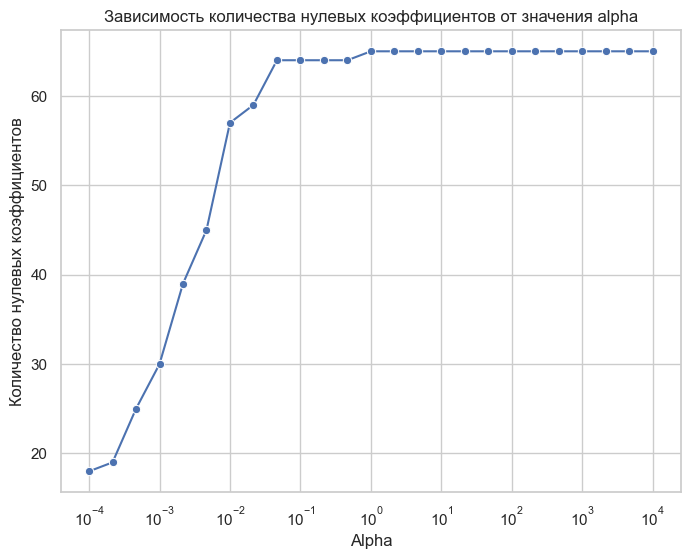

In [1337]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
z = []
for alpha in alphas:
    p  = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )),
    ('regression', Lasso(alpha=alpha))
    ])
    model = p.fit(X_train, y_train)
    coef = model.named_steps['regression'].coef_
    ans = len(coef[coef == 0])
    z.append(ans)


sns.set(style="whitegrid")   
plt.figure(figsize=(8, 6))
sns.lineplot(x=alphas, y=z, palette='green', marker='o')


plt.xscale("log")
plt.title('Зависимость количества нулевых коэффициентов от значения alpha')
plt.xlabel("Alpha")
plt.ylabel("Количество нулевых коэффициентов")
plt.show()

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?


Такой признак полезен, потому что он захватывает взаимодействия между начальной и конечной ячейками, которые могут влиять на результат поездки, но не видны при анализе отдельных признаков. Сама по себе линейная модель не может самостоятельно выявить эти взаимодействия, так как она предполагает, скорее, аддитивное влияние признаков и не учитывает их совместное воздействие. Кодирование частых пар позволяет модели сосредоточиться на наиболее значимых комбинациях, улучшая качество предсказаний.

In [1338]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

counts = (
    X_train_trans[(X_train_trans['start_num'] != 1) & (X_train_trans['finish_num'] != 1)]
    .groupby(['start_num', 'finish_num'])
    .agg({'id': 'count'})
)

top = counts.nlargest(100,'id').index
toplist = list(top)

def encode_top_combinations(row, toplist):
    if (row['start_num'], row['finish_num']) in toplist:
        return toplist.index(
        (row['start_num'], row['finish_num'])
        )
    return -1

X_train_trans['coded'] = X_train_trans.apply(
    lambda row: encode_top_combinations(row, toplist), axis=1
)

X_test_trans['coded'] = X_test_trans.apply(
    lambda row: encode_top_combinations(row, toplist), axis=1
)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [1340]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X = X_train_trans[['vendor_id','passenger_count', 'store_and_fwd_flag', 'day_of_year', 
            'day_of_week', 'hour', 'month', 'log_haversine',
            'in_traffic', 'free_roads', 'airport', 'anomalia', 'started_in_cent_park','finished_in_cent_park',  'start_num',
       'finish_num', 'coded']]

y = X_train_trans['log_trip_duration']

Xtest = X_test_trans[['vendor_id','passenger_count', 'store_and_fwd_flag', 'day_of_year', 
            'day_of_week', 'hour', 'month', 'log_haversine',
            'in_traffic', 'free_roads', 'airport', 'anomalia', 'started_in_cent_park','finished_in_cent_park',  'start_num',
       'finish_num', 'coded']]

ytest = X_test_trans['log_trip_duration']

categorical_features = ['vendor_id', 'store_and_fwd_flag', 'passenger_count', 'day_of_week', 'month', 
                        'start_num', 'finish_num', 'in_traffic', 'free_roads', 
                        'airport', 
                        'started_in_cent_park','finished_in_cent_park', 'anomalia', 'coded'
                        ]
numerical_features = ['log_haversine', 'day_of_year', 'hour']

pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )),
    ('regressor', Ridge())
])

pipeline.fit(X, y)
predictions = pipeline.predict(Xtest)
rmsle_value = rmsle(ytest, predictions)
print(f'RMSLE: {rmsle_value}')

RMSLE: 0.4820185367757572


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

In [1341]:
<a href="https://ibb.co/zVnJZhk"><img src="https://i.ibb.co/tpmXDMd/2024-10-27-23-47-28.png" alt="2024-10-27-23-47-28" border="0"></a>

SyntaxError: invalid syntax (768600033.py, line 1)